In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-shopping-reviews-daily-updated/amazon_reviews.csv


# Project. Amazon Shopping Reviews 
## Goal
> ## EDA : Interpreting data distribution plots
> ## Modeling :  Predicting reviews by content

# Import Libraries & Read Dataset

In [2]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# For Modeling
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
import torch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("/kaggle/input/amazon-shopping-reviews-daily-updated/amazon_reviews.csv")
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,94f3ab51-f208-4890-8d9b-0e68a221cccc,Vernita Jones,Amazon turely has everything you need,5,0,28.7.0.100,2024-05-20 22:55:37,28.7.0.100
1,f2b7e19a-8c56-4a84-b8fb-d2e901a485d4,Ray Rust,Great place to shop and delivery is fast.,5,0,28.10.0.100,2024-05-20 22:17:03,28.10.0.100
2,72c51b6c-eff9-490b-bf16-85ff9d82140c,Timothy A. Williams (OG LOR TIMMY),Exceptional...,5,0,28.7.0.100,2024-05-20 22:15:55,28.7.0.100
3,fe43c349-c680-4079-932c-a1e9bedef865,S C,Why would you state that products are hazardou...,1,2,28.10.0.100,2024-05-20 22:10:38,28.10.0.100
4,30a1f5eb-85d2-4d42-8f38-c42d125d644c,brandon sawyer,Can't use on my samsung s22 ultra!,1,0,NaN,2024-05-20 21:49:55,NaN
...,...,...,...,...,...,...,...,...
51142,ac82191a-e776-42a0-8e30-91eabb763968,Mary Mora,Amazon Smile donates. Make sure you get all se...,5,0,26.1.2.100,2023-01-16 06:12:14,26.1.2.100
51143,3aa6af38-b044-4257-9cf3-b94c437da0ef,Marie Elliott,After having problems with the app and having ...,5,1,22.18.0.100,2021-09-24 12:01:29,22.18.0.100
51144,727ec38a-c633-48f4-a302-66e52740a43c,Dan Preston,"Used to be great. Got greedy, they ruined the ...",1,0,26.9.0.100,2023-05-15 18:27:24,26.9.0.100
51145,615a9643-cd36-4010-9a81-8763bac11ddf,Jhosh,New search bar location sucks. At least give m...,2,0,26.12.0.100,2023-06-11 15:24:08,26.12.0.100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51147 entries, 0 to 51146
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              51147 non-null  object
 1   userName              51142 non-null  object
 2   content               51146 non-null  object
 3   score                 51147 non-null  int64 
 4   thumbsUpCount         51147 non-null  int64 
 5   reviewCreatedVersion  46211 non-null  object
 6   at                    51147 non-null  object
 7   appVersion            46211 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,51147.0,2.422762,1.642914,1.0,1.0,2.0,4.0,5.0
thumbsUpCount,51147.0,13.546210,85.314284,0.0,0.0,1.0,3.0,5660.0


# Data Preprocessing

In [6]:
df.isna().mean()

reviewId                0.000000
userName                0.000098
content                 0.000020
score                   0.000000
thumbsUpCount           0.000000
reviewCreatedVersion    0.096506
at                      0.000000
appVersion              0.096506
dtype: float64

In [7]:
df.drop(['reviewId', 'userName', 'reviewCreatedVersion', 'appVersion'], axis=1, inplace=True)

In [8]:
df.dropna(inplace = True)
df.isna().sum()

content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [9]:
def classify_review(score):
    if score in [1,2]:
        return 'bad'
    elif score == 3:
        return 'normal'
    elif score in [4,5]:
        return 'good'

df['review'] = df['score'].apply(classify_review)
df['date'] = pd.to_datetime(df['at'])
df.drop('at', axis=1 ,inplace=True)

In [10]:
df.head(10)

,content,score,thumbsUpCount,review,date
0,Amazon turely has everything you need,5,0,good,2024-05-20 22:55:37
1,Great place to shop and delivery is fast.,5,0,good,2024-05-20 22:17:03
2,Exceptional...,5,0,good,2024-05-20 22:15:55
3,Why would you state that products are hazardou...,1,2,bad,2024-05-20 22:10:38
4,Can't use on my samsung s22 ultra!,1,0,bad,2024-05-20 21:49:55
5,love Amazon,5,0,good,2024-05-20 21:34:23
6,Hate this app period.,1,0,bad,2024-05-20 21:28:26
7,Can't search & find keywords in reviews anymor...,2,38,bad,2024-05-20 21:08:56
8,"If we disable RUFUS, let it stay disabled. Tur...",1,0,bad,2024-05-20 21:07:23
9,Great service,5,0,good,2024-05-20 21:04:26


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51146 entries, 0 to 51146
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        51146 non-null  object        
 1   score          51146 non-null  int64         
 2   thumbsUpCount  51146 non-null  int64         
 3   review         51146 non-null  object        
 4   date           51146 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.3+ MB


# EDA
> ## Data Visualization

#  Relation to the score and thumbsUpCount  & the distribution map of score and thumbsUpCount

In [12]:
fig = px.violin(df, x='thumbsUpCount')

fig.update_layout(
    title='Violin Plot of ThumbsUpCounts',
    title_font_size=25,
    xaxis_title='thumbsUpCount',
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Density',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()

In [13]:
count_df = df.groupby('score')['thumbsUpCount'].count().reset_index(name='count')

fig = px.bar(count_df, x='score', y='count', color='score', 
             labels={'score': 'Score', 'count': 'Count'}, 
             title='Count of thumbsUpCount by Score')

fig.update_layout(
    title_font_size=25,
    xaxis_title='Score',
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Count',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()

In [14]:
mean_df = df.groupby('score')['thumbsUpCount'].mean().reset_index(name='mean')


fig = px.bar(mean_df, x='score', y='mean', color='score', 
             labels={'score': 'Score', 'mean': 'Mean thumbsUpCount'}, 
             title='Mean thumbsUpCount by Score',)

fig.update_layout(
    xaxis_title='Score',
    title_font_size=25,
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Mean thumbsUpCount',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()

In [15]:
score_groups = df.groupby('score')['thumbsUpCount']
fig = make_subplots(rows=1, cols=len(score_groups), shared_yaxes=True, subplot_titles=[f"Score {score}" for score, _ in score_groups])

for i, (score, group) in enumerate(score_groups):
    fig.add_trace(go.Box(y=group, name=f"Score {score}"), row=1, col=i+1)

fig.update_layout(
    title='Box Plot of thumbsUpCount by Score',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()

# Review Analysis

In [16]:
review_order = ['bad', 'normal', 'good']
df['review'] = pd.Categorical(df['review'], categories=review_order, ordered=True)

fig = px.histogram(df, x='review', nbins=10, color='review',
                   color_discrete_sequence=px.colors.sequential.Viridis,
                   category_orders={'review': review_order})

fig.update_layout(
    title='Histogram of Scores',
    title_font_size=25,
    xaxis_title='Score',
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Frequency',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()


In [17]:
review_order = ['bad', 'normal', 'good']
df['review'] = pd.Categorical(df['review'], categories=review_order, ordered=True)

mean_df = df.groupby('review')['thumbsUpCount'].mean().reset_index(name='mean')

fig = px.bar(mean_df, x='review', y='mean', color='review',
             labels={'review': 'Score', 'mean': 'Mean thumbsUpCount'},
             title='Mean thumbsUpCount by Score')

fig.update_layout(
    xaxis_title='Score',
    title_font_size=25,
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Mean thumbsUpCount',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()

# Time series analysis of reviews

In [18]:
df_counts = df.groupby([pd.Grouper(key='date', freq='D'), 'review']).size().reset_index(name='count')

fig = px.line(df_counts, x='date', y='count', color='review', 
              title='Review Counts Over Time',
              labels={'date': 'Date', 'count': 'Review Count', 'review': 'Review'},
              color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(
    title_font_size=25,
    xaxis_title='Date',
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Review Count',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig.show()


In [19]:
df.set_index('date', inplace=True) # Indexing : Date

# Yearly
df_yearly = df.groupby(df.index.year)['review'].value_counts().unstack()
df_monthly = df.groupby(df.index.month)['review'].value_counts().unstack()


fig_yearly = px.bar(df_yearly, x=df_yearly.index, y=df_yearly.columns, barmode='group',
                     title='Review Counts by Year',
                     labels={'index': 'Year', 'value': 'Review Count', 'variable': 'Review'},
                     color_discrete_sequence=px.colors.qualitative.Safe)

fig_yearly.update_layout(
    xaxis_title='Year',
    title_font_size=25,
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Review Count',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig_yearly.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig_yearly.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig_yearly.show()

# Monthly
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig_monthly = px.bar(df_monthly, x=df_monthly.index, y=df_monthly.columns, barmode='group',
                      title='Review Counts by Month',
                      labels={'index': 'Month', 'value': 'Review Count', 'variable': 'Review'},
                      color_discrete_sequence=px.colors.qualitative.Safe)

fig_monthly.update_layout(
    xaxis_title='Month',
    title_font_size=25,
    xaxis_title_font_size=18,
    xaxis_title_font_color='white',
    yaxis_title='Review Count',
    yaxis_title_font_size=18,
    yaxis_title_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig_monthly.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='white', griddash='dash',
    tickvals=list(range(1, 13)),
    ticktext=month_names
)
fig_monthly.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')

fig_monthly.show()

# Modeling :  Predicting reviews by content

# BERT Embedding

In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().cpu().numpy()

X = np.array([embed_text(text) for text in df['content']])
X = X.squeeze(axis=1)  
y = df['review']

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# Compare Model 

In [21]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

results = []

for name, model in models.items():
    if name == "XGBoost":
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, accuracy])


results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.390146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 40916, number of used features: 768
[LightGBM] [Info] Start training from score -0.488972
[LightGBM] [Info] Start training from score -1.234395
[LightGBM] [Info] Start training from score -2.346195


,Model,Accuracy
0,Random Forest,0.820821
1,SVC,0.838905
2,Logistic Regression,0.830108
3,XGBoost,0.828739
4,LightGBM,0.826979


# LightGBM : Classifier

In [22]:
## Grid search

#  param_grid = {
#    'num_leaves': np.arange(20, 151, 10),  
#    'learning_rate': np.arange(0.01, 0.11, 0.01),  
#    'n_estimators': np.arange(100, 501, 100),  
#    'min_child_samples': np.arange(20, 101, 20),  
#    'subsample': np.arange(0.5, 1.0, 0.1),  
#    'colsample_bytree': np.arange(0.5, 1.0, 0.1)  
# }

# lgb_model = lgb.LGBMClassifier()

# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best accuracy score: {grid_search.best_score_}")

# best_lgb_model = grid_search.best_estimator_
# y_pred = best_lgb_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test set accuracy with best LightGBM model: {accuracy:.4f}")

In [23]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    reg_lambda=3,
    objective='multiclass',
    num_class=3,
    num_leaves=64,  
    verbose=-1
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss'
)

LGBMClassifier(max_depth=6, n_estimators=1000, num_class=3, num_leaves=64,
               objective='multiclass', reg_lambda=3, verbose=-1)

In [24]:
y_pred = lgb_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6196
           1       0.88      0.82      0.85      3055
           2       0.38      0.03      0.06       979

    accuracy                           0.83     10230
   macro avg       0.69      0.61      0.60     10230
weighted avg       0.80      0.83      0.80     10230



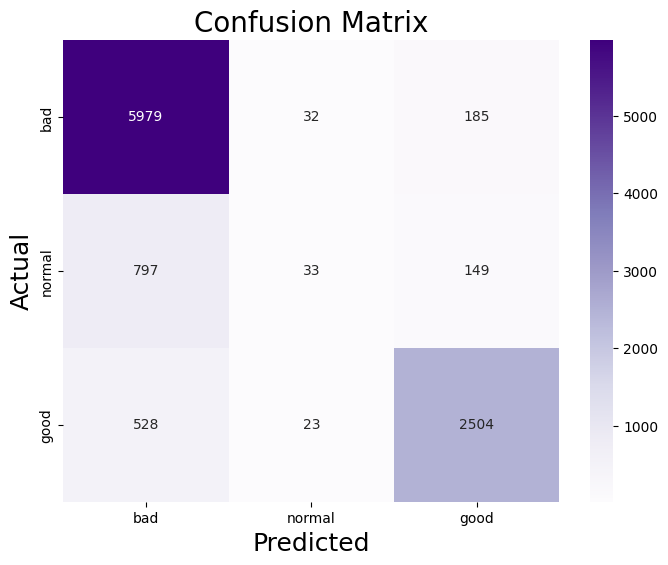

In [25]:
original_label_order = ['bad', 'good', 'normal']
label_order = ['bad', 'normal', 'good']

label_to_index = {'bad': 0, 'good': 1, 'normal': 2}

conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

index_map = {label: i for i, label in enumerate(original_label_order)}
sorted_indices = [index_map[label] for label in label_order]

conf_matrix_sorted = conf_matrix[sorted_indices, :]
conf_matrix_sorted = conf_matrix_sorted[:, sorted_indices]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sorted, annot=True,fmt='d', cmap='Purples', xticklabels=label_order, yticklabels=label_order)
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.show()

# Thanks